In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from tqdm import tqdm

# LeNet5

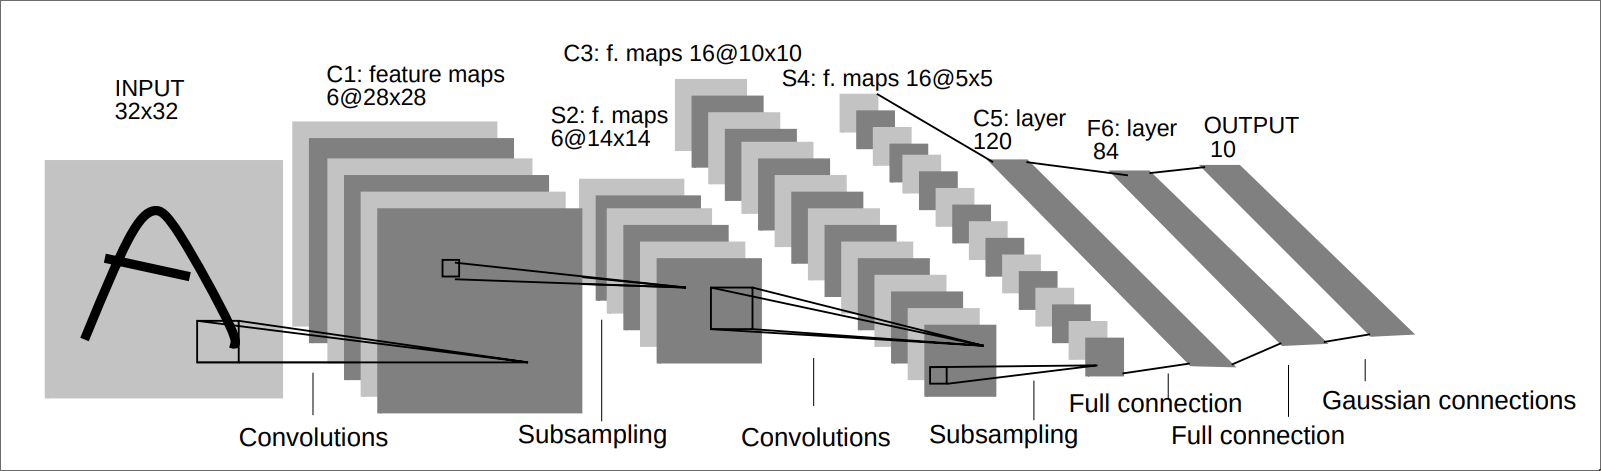

[LeNet 5 Architecture Explained](https://medium.com/@siddheshb008/lenet-5-architecture-explained-3b559cb2d52b)

## Lenet Architecture

In [20]:
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.conv1 = nn.Conv2d(1,6, kernel_size=5, stride=1, padding=0)
    self.conv2 = nn.Conv2d(6,16, kernel_size=5, stride=1, padding=0)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84,10)

  def forward(self, x):
    x = torch.tanh(self.conv1(x)) # ip = 32 x 32 x 1 | op = 28 x 28 x 6
    x = torch.max_pool2d(x, kernel_size=2, stride=2) # ip = 28 x 28 x 6 | op = 14 x 14 x 6
    x = torch.tanh(self.conv2(x)) # ip = op = 14 x 14 x 6 | op = 10 x 10 x 16
    x = torch.max_pool2d(x, kernel_size=2, stride=2) # ip = 10 x 10 x 16 | op = 5 x 5 x 16
    x = x.view(-1, 16 * 5 * 5) #flatenning tensor for fc layer to shape 1 x 16*5*5
    x = torch.tanh(self.fc1(x)) # ip = 1 x 16*5*5 | op = 120
    x = torch.tanh(self.fc2(x)) # ip = 120 | op = 84
    x = self.fc3(x) # ip = 84 | op = 10
    return x

## Hyperparameters

In [21]:
batch_size = 64
learning_rate = 0.001
epochs = 20

## Data

In [22]:
transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5))  #normalizing data [-1,+1]
    # transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.1) # adding noise to data to enhance model
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("data ready!")

data ready!


In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [24]:
for image, label in train_loader:
    print(image.shape)
    break

torch.Size([64, 1, 32, 32])


## Initializing Model

In [36]:
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
epoch_losses = []

## Model Training

In [37]:
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    labels = torch.tensor(labels, dtype=torch.long) # converting labels from int to tensor
    images, labels = images.to(device), labels.to(device)

    # feedforward
    output = model(images)
    loss = criterion(output, labels)

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  avg_loss = running_loss/len(train_loader)
  epoch_losses.append(avg_loss)
  print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

/tmp/ipykernel_31482/706365177.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long) # converting labels from int to tensor


Epoch [1/20], Loss: 0.2129
Epoch [2/20], Loss: 0.0629
Epoch [3/20], Loss: 0.0439
Epoch [4/20], Loss: 0.0339
Epoch [5/20], Loss: 0.0268
Epoch [6/20], Loss: 0.0207
Epoch [7/20], Loss: 0.0156
Epoch [8/20], Loss: 0.0152
Epoch [9/20], Loss: 0.0117
Epoch [10/20], Loss: 0.0125
Epoch [11/20], Loss: 0.0098
Epoch [12/20], Loss: 0.0080
Epoch [13/20], Loss: 0.0089
Epoch [14/20], Loss: 0.0080
Epoch [15/20], Loss: 0.0063
Epoch [16/20], Loss: 0.0095
Epoch [17/20], Loss: 0.0073
Epoch [18/20], Loss: 0.0053
Epoch [19/20], Loss: 0.0071
Epoch [20/20], Loss: 0.0059


Loss vs Epoch

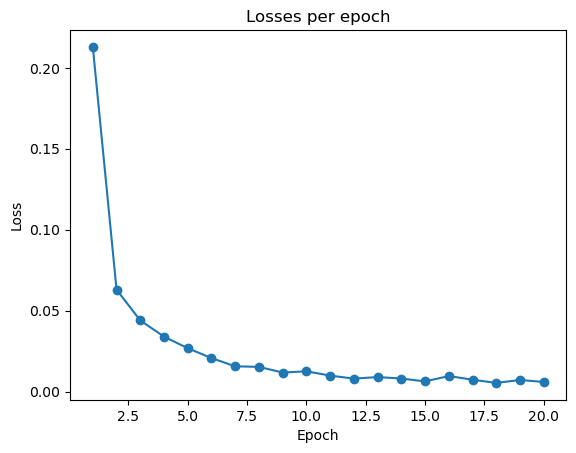

In [38]:
plt.plot(range(1,epochs+1), epoch_losses, marker='o')
plt.title("Losses per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Model Evaluation

In [39]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")
lenet_accuracy=100 * correct / total

Test Accuracy: 98.73%


Training model with decreased learning rate and more epochs

/tmp/ipykernel_31482/3079440262.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long) # converting labels from int to tensor


Epoch [1/40], Loss: 2.1464
Epoch [2/40], Loss: 1.5103
Epoch [3/40], Loss: 1.0439
Epoch [4/40], Loss: 0.8027
Epoch [5/40], Loss: 0.6491
Epoch [6/40], Loss: 0.5406
Epoch [7/40], Loss: 0.4619
Epoch [8/40], Loss: 0.4037
Epoch [9/40], Loss: 0.3593
Epoch [10/40], Loss: 0.3247
Epoch [11/40], Loss: 0.2968
Epoch [12/40], Loss: 0.2734
Epoch [13/40], Loss: 0.2537
Epoch [14/40], Loss: 0.2363
Epoch [15/40], Loss: 0.2212
Epoch [16/40], Loss: 0.2076
Epoch [17/40], Loss: 0.1955
Epoch [18/40], Loss: 0.1846
Epoch [19/40], Loss: 0.1748
Epoch [20/40], Loss: 0.1660
Epoch [21/40], Loss: 0.1578
Epoch [22/40], Loss: 0.1504
Epoch [23/40], Loss: 0.1437
Epoch [24/40], Loss: 0.1375
Epoch [25/40], Loss: 0.1318
Epoch [26/40], Loss: 0.1267
Epoch [27/40], Loss: 0.1220
Epoch [28/40], Loss: 0.1175
Epoch [29/40], Loss: 0.1135
Epoch [30/40], Loss: 0.1097
Epoch [31/40], Loss: 0.1062
Epoch [32/40], Loss: 0.1030
Epoch [33/40], Loss: 0.0999
Epoch [34/40], Loss: 0.0971
Epoch [35/40], Loss: 0.0945
Epoch [36/40], Loss: 0.0921
E

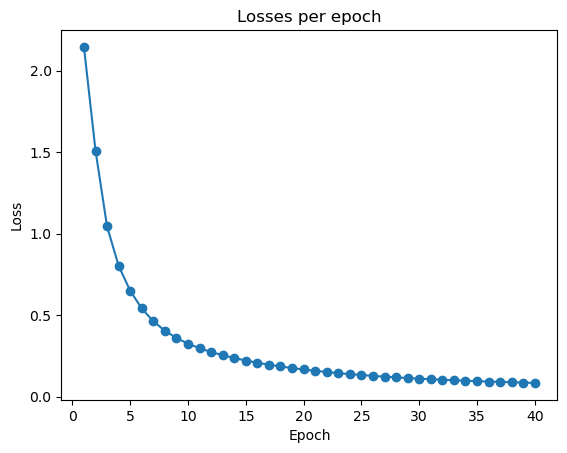

In [40]:
learning_rate = 0.00001
epochs = 40


model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
epoch_losses = []

for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    labels = torch.tensor(labels, dtype=torch.long) # converting labels from int to tensor
    images, labels = images.to(device), labels.to(device)

    # feedforward
    output = model(images)
    loss = criterion(output, labels)

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  avg_loss = running_loss/len(train_loader)
  epoch_losses.append(avg_loss)
  print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

plt.plot(range(1,epochs+1), epoch_losses, marker='o')
plt.title("Losses per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [41]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")
lenet_accuracy=100 * correct / total

Test Accuracy: 97.61%


/tmp/ipykernel_31482/2889155266.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long) # converting labels from int to tensor


Epoch [1/20], Loss: 2.8081
Epoch [2/20], Loss: 2.8319
Epoch [3/20], Loss: 2.8255
Epoch [4/20], Loss: 2.7780
Epoch [5/20], Loss: 2.8138
Epoch [6/20], Loss: 2.8006
Epoch [7/20], Loss: 2.7547
Epoch [8/20], Loss: 2.8232
Epoch [9/20], Loss: 2.7947
Epoch [10/20], Loss: 2.7540
Epoch [11/20], Loss: 2.7926
Epoch [12/20], Loss: 2.8325
Epoch [13/20], Loss: 2.7911
Epoch [14/20], Loss: 2.7727
Epoch [15/20], Loss: 2.7644
Epoch [16/20], Loss: 2.8226
Epoch [17/20], Loss: 2.7356
Epoch [18/20], Loss: 2.7964
Epoch [19/20], Loss: 2.8304
Epoch [20/20], Loss: 2.8641


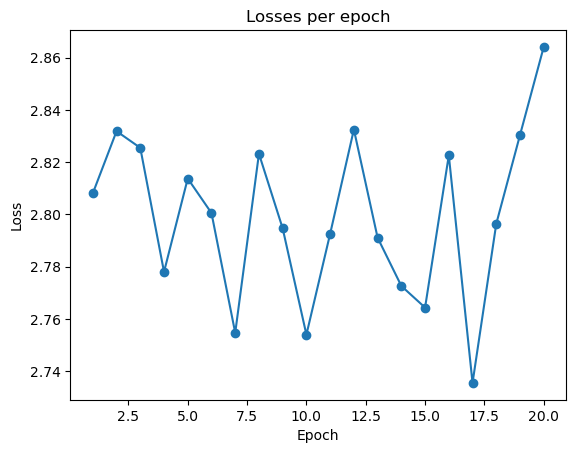

In [42]:
learning_rate = 0.1
epochs = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
epoch_losses = []

for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    labels = torch.tensor(labels, dtype=torch.long) # converting labels from int to tensor
    images, labels = images.to(device), labels.to(device)

    # feedforward
    output = model(images)
    loss = criterion(output, labels)

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  avg_loss = running_loss/len(train_loader)
  epoch_losses.append(avg_loss)
  print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

plt.plot(range(1,epochs+1), epoch_losses, marker='o')
plt.title("Losses per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [43]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")
lenet_accuracy=100 * correct / total

Test Accuracy: 11.35%


In [44]:
learning_rates = [0.01,0.001,0.0001,1e-5,1e-6, 1e-7]
test_accuracies = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for learning_rate in learning_rates:
  epochs = 15
  model = LeNet5().to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  epoch_losses = []

  for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
      labels = torch.tensor(labels, dtype=torch.long) # converting labels from int to tensor
      images, labels = images.to(device), labels.to(device)

      # feedforward
      output = model(images)
      loss = criterion(output, labels)

      # Backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      running_loss += loss.item()

    avg_loss = running_loss/len(train_loader)
    epoch_losses.append(avg_loss)
  print("Model Training Complete! ")
  model.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print(f"Learning rate: {learning_rate} Test Accuracy: {100 * correct / total:.2f}%")
  lenet_accuracy=100 * correct / total
  test_accuracies.append(lenet_accuracy)
  print("Model Evaluation Complete! ")
  print("******************************************************")

/tmp/ipykernel_31482/820196980.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long) # converting labels from int to tensor


Model Training Complete! 
Learning rate: 0.01 Test Accuracy: 95.85%
Model Evaluation Complete! 
******************************************************
Model Training Complete! 
Learning rate: 0.001 Test Accuracy: 98.72%
Model Evaluation Complete! 
******************************************************
Model Training Complete! 
Learning rate: 0.0001 Test Accuracy: 98.52%
Model Evaluation Complete! 
******************************************************
Model Training Complete! 
Learning rate: 1e-05 Test Accuracy: 94.84%
Model Evaluation Complete! 
******************************************************
Model Training Complete! 
Learning rate: 1e-06 Test Accuracy: 67.54%
Model Evaluation Complete! 
******************************************************
Model Training Complete! 
Learning rate: 1e-07 Test Accuracy: 23.39%
Model Evaluation Complete! 
******************************************************


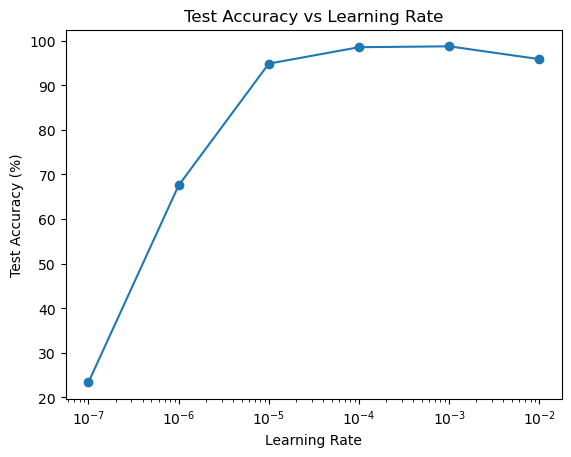

In [45]:
plt.semilogx(learning_rates, test_accuracies, marker='o')
plt.title("Test Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Test Accuracy (%)")
plt.show()

# ResNet

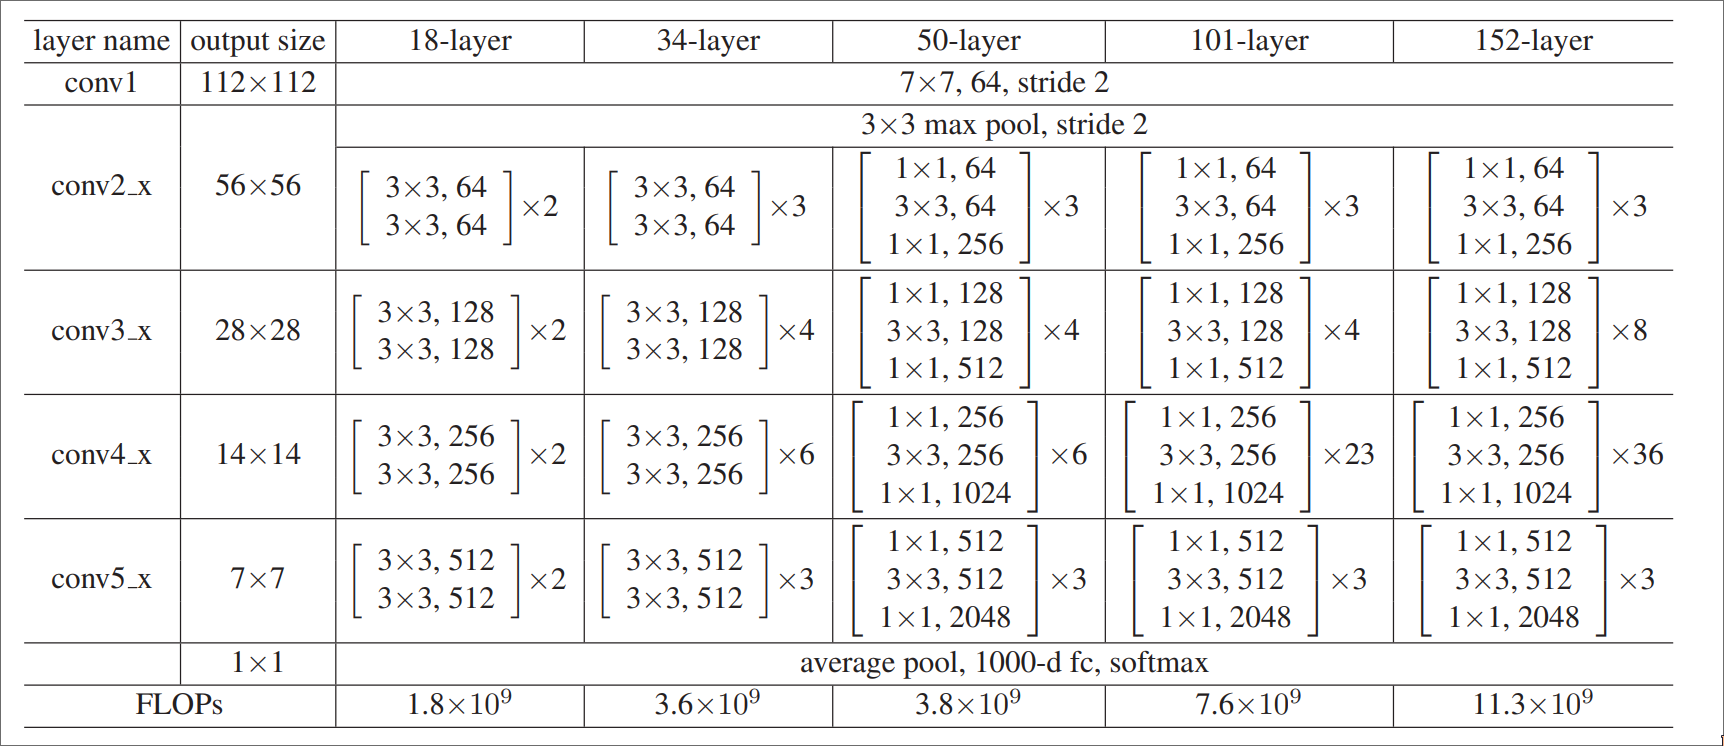

We will be implementing ResNet50, ResNet101 and ResNet152

[A Comprehensive Guide to Understanding and Implementing Bottleneck Residual Blocks](https://medium.com/@neetu.sigger/a-comprehensive-guide-to-understanding-and-implementing-bottleneck-residual-blocks-6b420706f66b)

## BottleNeck Residual Block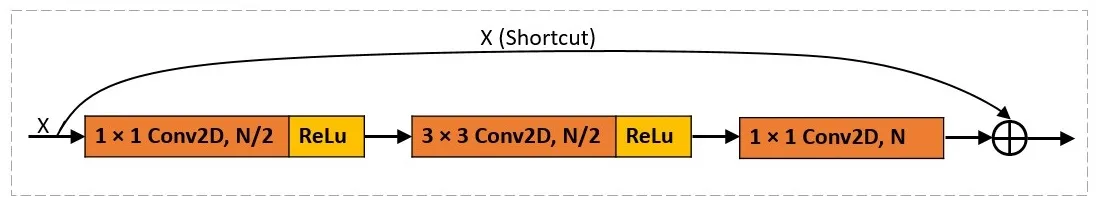

 - A 1x1 convolutional layer that reduces the number of channels (filters) in the input tensor by a factor, usually a half. This layer is responsible for creating the bottleneck.
 - A 3x3 convolutional layer that performs the main convolution operation on the reduced number of channels. This layer is responsible for learning spatial features.
 - A 1x1 convolutional layer that restores the number of channels to the original number. This layer is responsible for expanding the output back to the original dimension.

In [2]:
class block(nn.Module):
  def __init__(self, in_channels, out_channels, identity_downsample=None, stride=1):
    super(block, self,).__init__()
    self.expansion = 4
    self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0)
    self.bn1 = nn.BatchNorm2d(out_channels)
    self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1)
    self.bn2 = nn.BatchNorm2d(out_channels)
    self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, kernel_size=1, stride=1, padding=0)
    self.bn3 = nn.BatchNorm2d(out_channels*self.expansion)
    self.relu = nn.ReLU()
    self.identity_downsample = identity_downsample

  def forward(self, x):
    identity = x

    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.bn2(x)
    x = self.relu(x)
    x = self.conv3(x)
    x = self.bn3(x)

    # matching dimension of identity with output if dimension of identity and output don't match
    if self.identity_downsample is not None:
      identity = self.identity_downsample(identity)

    x += identity
    x = self.relu(x)
    return x

## ResNet Architecture

In [3]:
class ResNet(nn.Module): # [3,4,6,3]
  def __init__(self, block, layers, image_channels, num_classes):
    super(ResNet, self).__init__()
    self.in_channels = 64

    # conv1 layer: normal conv layer using the above block
    self.conv1 = nn.Conv2d(image_channels, 64, kernel_size=7, stride=2, padding=3)
    self.bn1 = nn.BatchNorm2d(64)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    # Resnet layers
    self.layer1 = self.__make_layer__(block, layers[0], out_channels=64, stride=1) # conv2_x
    self.layer2 = self.__make_layer__(block, layers[1], out_channels=128, stride=2) # conv3_x
    self.layer3 = self.__make_layer__(block, layers[2], out_channels=256, stride=2) # conv4_x
    self.layer4 = self.__make_layer__(block, layers[3], out_channels=512, stride=2) # conv5_x

    self.avgpool = nn.AdaptiveAvgPool2d((1,1)) # avg pool
    self.fc = nn.Linear(512*4, num_classes) # final fc layer to output class probability

  def forward(self,x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)

    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)

    x = self.avgpool(x)
    x = x.reshape(x.shape[0], -1)
    x = self.fc(x)

    return x

  def __make_layer__(self, block, num_residual_block, out_channels, stride):
    # num_residual_block = number of times the block is used while in the layer
    identity_downsample = None
    layers = []

    if stride != 1 or self.in_channels != out_channels*4:
      # if we change the number of channels
      identity_downsample = nn.Sequential(
          nn.Conv2d(self.in_channels, out_channels * 4, kernel_size=1, stride=stride),
          nn.BatchNorm2d(out_channels * 4)
        )

    # Layer that changes number of channels
    layers.append(block(self.in_channels, out_channels, identity_downsample, stride))
    self.in_channels = out_channels * 4 # 256

    for i in range(1, num_residual_block):
      layers.append(block(self.in_channels, out_channels)) # 256 -> 64, 64*4 (256) again

    return nn.Sequential(*layers)

## Resnet Models

In [4]:
# ResNet50
def ResNet50(img_channels=3, num_classes=10):
  return ResNet(block, [3,4,6,3], img_channels, num_classes)

# ResNet101
def ResNet101(img_channels=3, num_classes=10):
  return ResNet(block, [3,4,23,3], img_channels, num_classes)

# ResNet152
def ResNet152(img_channels=3, num_classes=10):
  return ResNet(block, [3,8,36,3], img_channels, num_classes)

## Hyperparameters

In [6]:
batch_size = 4
learning_rate = 0.0001
epochs = 10

## Data

In [7]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 for ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize grayscale images
    transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # Convert 1-channel to 3-channel
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Data ready!")

Data ready!


## Initializing Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ResNet50().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
torch.cuda.empty_cache()

## Model Training

In [9]:
for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    # Wrap the train_loader with tqdm for a progress bar
    progress_bar = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]")

    for batch_idx, (data, targets) in enumerate(progress_bar):
        data, targets = data.to(device), targets.to(device)

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # Update progress bar with current loss
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")


poch [1/10]: 100%|████████████████████████████████| 15000/15000 [16:01<00:00, 15.59it/s, loss=0.00393]

Epoch [1/10], Loss: 0.1819



poch [2/10]: 100%|███████████████████████████████| 15000/15000 [16:08<00:00, 15.49it/s, loss=0.000155]

Epoch [2/10], Loss: 0.0690



poch [3/10]: 100%|███████████████████████████████| 15000/15000 [15:57<00:00, 15.66it/s, loss=0.000799]

Epoch [3/10], Loss: 0.0501



poch [4/10]: 100%|████████████████████████████████| 15000/15000 [16:47<00:00, 14.89it/s, loss=7.15e-5]

Epoch [4/10], Loss: 0.0399



poch [5/10]: 100%|████████████████████████████████| 15000/15000 [16:54<00:00, 14.79it/s, loss=0.00128]

Epoch [5/10], Loss: 0.0318



poch [6/10]: 100%|████████████████████████████████| 15000/15000 [16:14<00:00, 15.39it/s, loss=5.96e-7]

Epoch [6/10], Loss: 0.0275



poch [7/10]: 100%|████████████████████████████████| 15000/15000 [16:14<00:00, 15.40it/s, loss=0.00138]

Epoch [7/10], Loss: 0.0231



poch [8/10]: 100%|████████████████████████████████| 15000/15000 [16:13<00:00, 15.40it/s, loss=1.95e-5]

Epoch [8/10], Loss: 0.0215



poch [9/10]: 100%|███████████████████████████████| 15000/15000 [15:37<00:00, 16.00it/s, loss=0.000853]

Epoch [9/10], Loss: 0.0190


Epoch [10/10]: 100%|███████████████████████████████| 15000/15000 [15:36<00:00, 16.01it/s, loss=4.44e-6]

Epoch [10/10], Loss: 0.0165


## Model Evaluation

In [10]:
model.eval()
correct = 0
total = 0
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()


In [11]:
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 99.52%


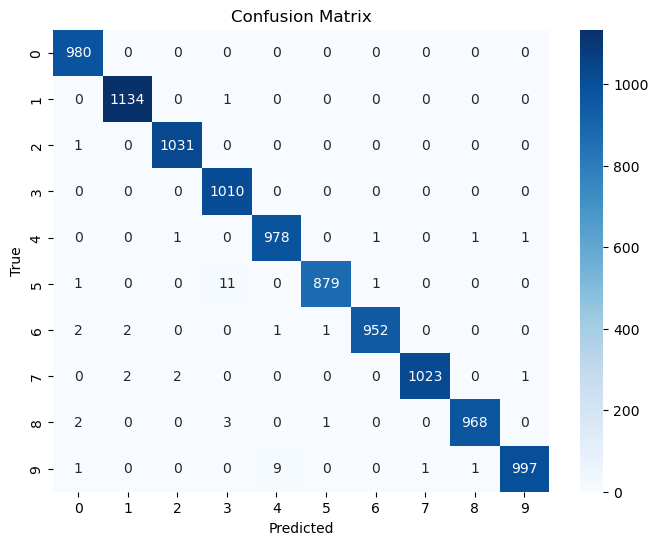

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
report = classification_report(all_labels, all_preds)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



# Vision Transformer

## ViT

In [6]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

/usr/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-20 17:10:11.390216: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-20 17:10:11.438948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734694811.473021   21227 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734694811.481483   21227 cuda_blas.cc:1418] Unable to register cuBLAS

Predicted class: Egyptian cat


The ViT model was pretrained on ImageNet-21k

## Hyperparameters

In [7]:
BATCH_SIZE = 4
learning_rate = 1e-4
epochs = 5

## Data

In [8]:
transform = transforms.Compose([
    transforms.Grayscale(3),  # Convert grayscale to 3-channel
    transforms.Resize((224, 224)),  # Resize to 224x224 for ViT
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

## Initializing Model

In [9]:
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224", num_labels = 10, ignore_mismatched_sizes=True)
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([10]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

## Model Training

In [ ]:
for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}"):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100. * correct / total
    print(f"Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_acc:.2f}%")

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            images, labels = batch
            images, labels = images.to(device), labels.to(device)

            outputs = model(images).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100. * correct / total
    print(f"Validation Loss: {val_loss / len(test_loader):.4f}, Validation Accuracy: {val_acc:.2f}%")

## Saving the Model

In [ ]:
torch.save(model.state_dict(), "vit_mnist.pth")
print("Fine-tuned model saved!")

## Model Evaluation

In [ ]:
model.eval()
test_loss = 0
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating on Test Data"):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        outputs = model(images).logits
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


avg_test_loss = test_loss / len(test_loader)
test_accuracy = 100. * correct / total

print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))  # For MNIST, digits 0-9
disp.plot(cmap="Blues", xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# End of Notebook